In [ ]:
import pandas as pd
message = pd.read_csv('dataset//spam.csv', encoding='latin-1')
df = message[['v1', 'v2']]
df.columns = ['label', 'text']

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df['text'].loc[100] # 100th text in the dataset

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [6]:
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [10]:
from nltk.corpus import stopwords
corpus = []
for i in range(0, len(df['text'])):
    review = re.sub('[^a-zA-Z]',' ',df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500, binary = True)
X = cv.fit_transform(corpus).toarray()

In [13]:
y = pd.get_dummies(df['label'])
y = y.iloc[:,1].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
from sklearn.naive_bayes import MultinomialNB
spam_detection_model = MultinomialNB().fit(x_train, y_train)

In [16]:
y_pred = spam_detection_model.predict(x_test)

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score = accuracy_score(y_test, y_pred)
print(score)
print(classification_report(y_test, y_pred))

0.9802690582959641
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       965
        True       0.93      0.92      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [43]:
class_names = sorted(df['label'].unique()) 
print(class_names)

['ham', 'spam']


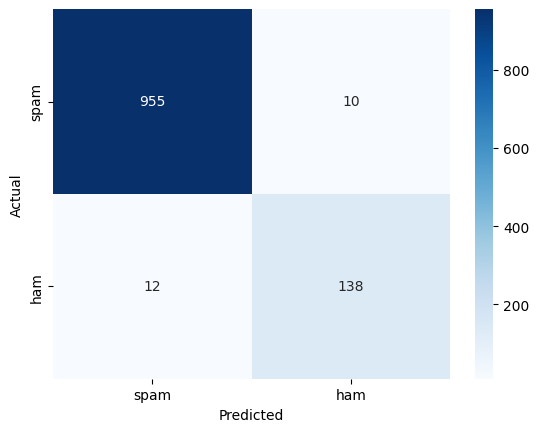

In [44]:
cm = confusion_matrix(y_test, y_pred)
class_names = ['spam','ham']
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()